<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


# Hypothesis (H1): There is a siginificant difference in the median value of the houses bounded by the Charles River.

# Null Hypothesis (H0): There is no significand difference in the media value of the houses bounded by the Charles River and those not bounded by it.

In [10]:
# Seperate the data to divide the dataset into two groups based on their relationship to the river

river_properties = boston_df[boston_df['CHAS'] == 1]
non_river_properties = boston_df[boston_df['CHAS'] == 0]

print(f"Properties bounded by Charles River: {len(river_properties)}")
print(f"Properties not bounded by Charles River: {len(non_river_properties)}")

Properties bounded by Charles River: 35
Properties not bounded by Charles River: 471


## Rank the Data: Combine the 'MEDV' values from both groups and rank them in ascending order. If there are ties, assign the average rank to the tied values.

In [11]:
river_medv = river_properties['MEDV']
non_river_medv = non_river_properties['MEDV']

# Create separate Series with group labels
river_series = pd.Series(river_medv.values, name='MEDV')
river_series['Group'] = 'River'

non_river_series = pd.Series(non_river_medv.values, name='MEDV')
non_river_series['Group'] = 'Non-River'

# Concatenate with reset_index to avoid duplicates
combined_data = pd.concat([
    pd.DataFrame({'MEDV': river_medv.values, 'Group': ['River'] * len(river_medv)}),
    pd.DataFrame({'MEDV': non_river_medv.values, 'Group': ['Non-River'] * len(non_river_medv)})
])

# Rank the combined MEDV values in ascending order 
combined_data['Rank'] = combined_data['MEDV'].rank(method='average')

# Sort by MEDV value to see the ranking in ascending order
ranked_data = combined_data.sort_values('MEDV')

# Display the first few rows to verify
print(ranked_data.head())

     MEDV      Group  Rank
363   5.0  Non-River   1.5
370   5.0  Non-River   1.5
365   5.6  Non-River   3.0
364   6.3  Non-River   4.0
454   7.0  Non-River   5.5


In [12]:
# 1. Compare the mean ranks of each group
river_mean_rank = combined_data[combined_data['Group'] == 'River']['Rank'].mean()
non_river_mean_rank = combined_data[combined_data['Group'] == 'Non-River']['Rank'].mean()

# 2. Compare the median MEDV values
river_median = river_properties['MEDV'].median()
non_river_median = non_river_properties['MEDV'].median()

# 3. Calculate the difference in rank distributions
rank_diff = river_mean_rank - non_river_mean_rank

# 4. Perform a basic t-test on the MEDV values (not on ranks)
from scipy import stats
t_stat, p_value = stats.ttest_ind(river_properties['MEDV'], non_river_properties['MEDV'], equal_var=False)

# 5. Calculate the proportion of river properties in the top quartile
top_quartile = combined_data['MEDV'].quantile(0.75)
river_in_top = (river_properties['MEDV'] > top_quartile).mean()
non_river_in_top = (non_river_properties['MEDV'] > top_quartile).mean()

# Print results
print(f"River properties mean rank: {river_mean_rank:.2f}")
print(f"Non-river properties mean rank: {non_river_mean_rank:.2f}")
print(f"Rank difference (River - Non-River): {rank_diff:.2f}")
print(f"River properties median MEDV: ${river_median:.2f}")
print(f"Non-river properties median MEDV: ${non_river_median:.2f}")
print(f"t-test results: t={t_stat:.2f}, p={p_value:.4f}")
print(f"Proportion in top quartile - River: {river_in_top:.2%}")
print(f"Proportion in top quartile - Non-River: {non_river_in_top:.2%}")

River properties mean rank: 328.84
Non-river properties mean rank: 247.90
Rank difference (River - Non-River): 80.94
River properties median MEDV: $23.30
Non-river properties median MEDV: $20.90
t-test results: t=3.11, p=0.0036
Proportion in top quartile - River: 45.71%
Proportion in top quartile - Non-River: 22.93%


## Boxplot for Median Value of Owner-Occupied Homes

<ipython-input-13-38fa92986c95>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Group", y="MEDV", data=combined_data,


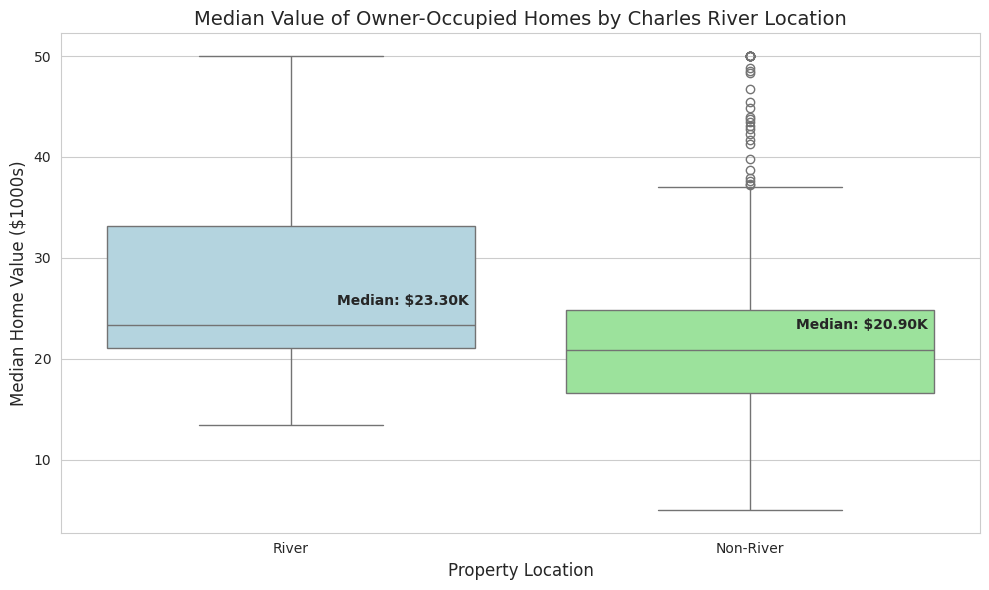

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the boxplot
ax = sns.boxplot(x="Group", y="MEDV", data=combined_data, 
                palette={"River": "lightblue", "Non-River": "lightgreen"})

# Add title and labels
plt.title("Median Value of Owner-Occupied Homes by Charles River Location", fontsize=14)
plt.xlabel("Property Location", fontsize=12)
plt.ylabel("Median Home Value ($1000s)", fontsize=12)

# Add some statistical annotations
river_median = river_properties['MEDV'].median()
non_river_median = non_river_properties['MEDV'].median()

# Annotate with median values
plt.annotate(f"Median: ${river_median:.2f}K", 
             xy=(0, river_median), 
             xytext=(0.1, river_median+2),
             fontweight='bold')

plt.annotate(f"Median: ${non_river_median:.2f}K", 
             xy=(1, non_river_median), 
             xytext=(1.1, non_river_median+2),
             fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

## Bar Plot for the Charles river variable

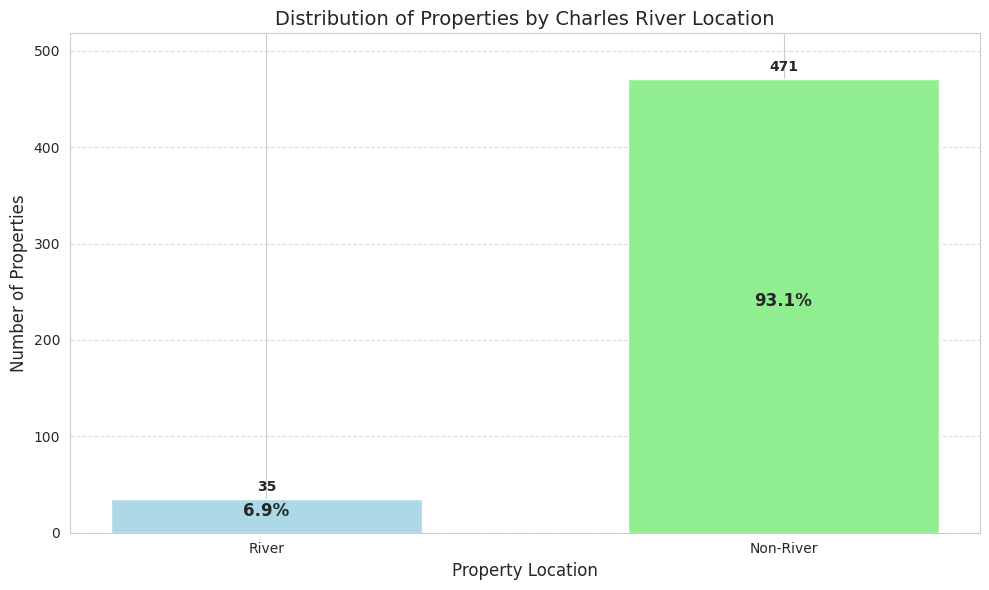

In [14]:
# Count the number of properties in each category
river_count = len(river_properties)
non_river_count = len(non_river_properties)

# Create a DataFrame for the counts
counts = pd.DataFrame({
    'Category': ['River', 'Non-River'],
    'Count': [river_count, non_river_count]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(counts['Category'], counts['Count'], 
        color=['lightblue', 'lightgreen'], 
        width=0.6)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height}',
             ha='center', va='bottom', fontweight='bold')

# Add percentage labels
total = river_count + non_river_count
plt.text(0, river_count/2, f'{river_count/total:.1%}', 
         ha='center', fontsize=12, fontweight='bold')
plt.text(1, non_river_count/2, f'{non_river_count/total:.1%}', 
         ha='center', fontsize=12, fontweight='bold')

# Add title and labels
plt.title('Distribution of Properties by Charles River Location', fontsize=14)
plt.ylabel('Number of Properties', fontsize=12)
plt.xlabel('Property Location', fontsize=12)

# Set y-axis to start from 0
plt.ylim(0, max(counts['Count']) * 1.1)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Box Plot for the MEDV variable vs the AGE variable

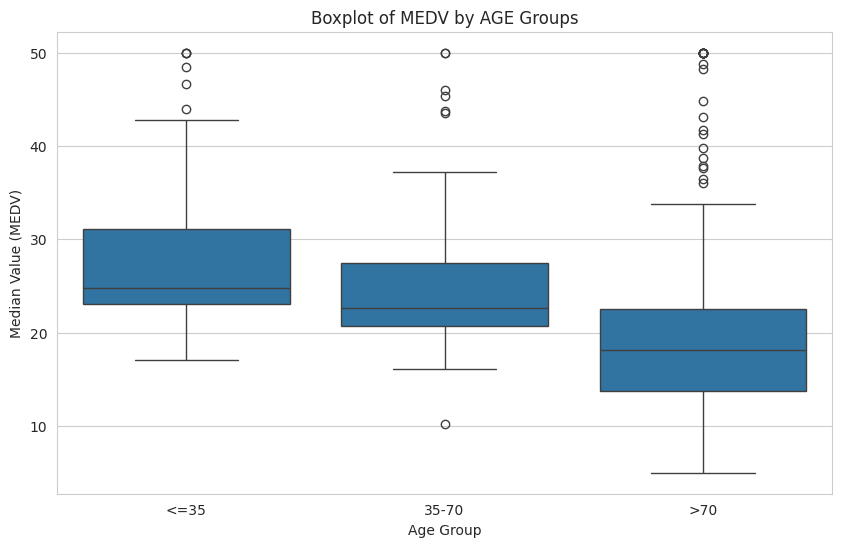

In [15]:
# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['<=35', '35-70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()

## scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

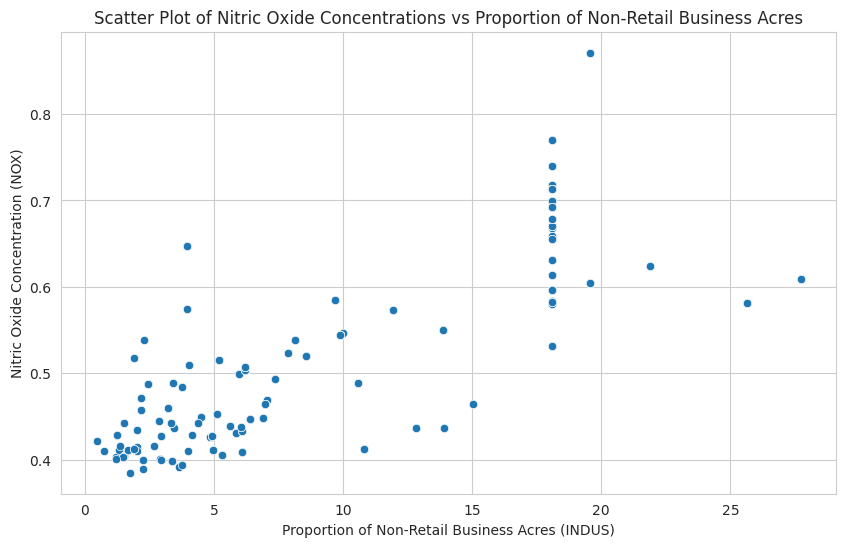

Correlation between INDUS and NOX: 0.764


In [16]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

# Calculate correlation for additional insight
correlation = boston_df['INDUS'].corr(boston_df['NOX'])
print(f"Correlation between INDUS and NOX: {correlation:.3f}")

## histogram for the pupil to teacher ratio variable

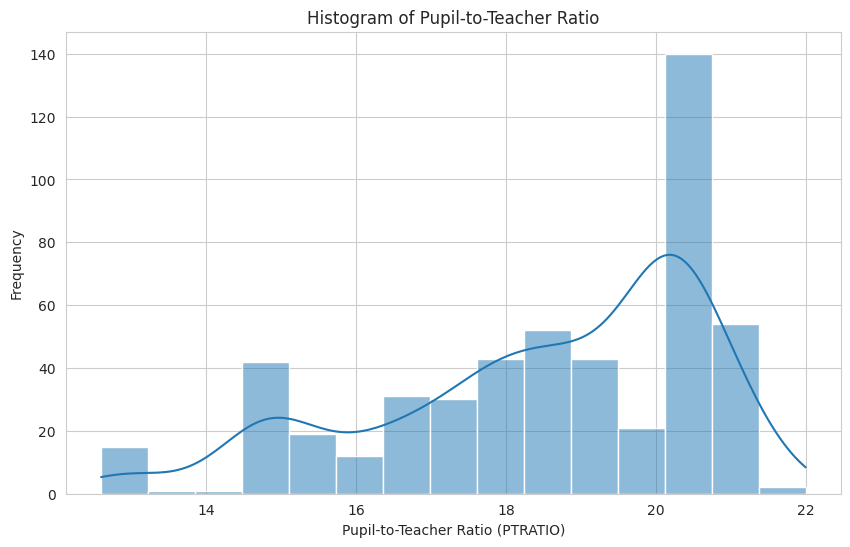

In [17]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [18]:
from scipy.stats import ttest_ind

medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)  # Welch's t-test (does not assume equal variances)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.113
P-value: 0.004
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [19]:
import pandas as pd
from scipy.stats import f_oneway

# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['<=35', '35-70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Separate MEDV values based on AGE groups
medv_age1 = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
medv_age2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
medv_age3 = boston_df[boston_df['AGE_group'] == '>70']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(medv_age1, medv_age2, medv_age3)

# Print results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in MEDV across AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV across AGE groups.")

F-statistic: 36.408
P-value: 0.000
Reject the null hypothesis: There is a significant difference in MEDV across AGE groups.


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [20]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.764
P-value: 0.000
Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS.


## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [21]:
import pandas as pd
import statsmodels.formula.api as smf

# Fit a simple linear regression model with DIS as the independent variable and MEDV as the dependent variable
model = smf.ols(formula='MEDV ~ DIS', data=boston_df).fit()

# Print the regression summary
print(model.summary())

# Extract and interpret the coefficient for DIS
dis_coeff = model.params['DIS']
print(f"\nThe impact of an additional unit of weighted distance to employment centers (DIS) on the median value of owner-occupied homes (MEDV) is approximately {dis_coeff:.3f} thousand dollars.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        17:00:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0